In [7]:
## import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import datetime
import missingno as msno   

In [8]:
# import the data 
train=pd.read_csv("https://raw.githubusercontent.com/zinduaschool/boston-housing-project---regression-Ozlojemo/main/train.csv?token=GHSAT0AAAAAACBUSCDRBNWV2DQXFL5VQULIZCJNDVQ")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# change the column names to lower case 
train.columns=map(str.lower,train.columns)
# data.columns = [x.lower() for x in data.columns] #would also suffice 
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Explore the missing values

In [10]:
# what is the number of missing values present 
total_missing=train.isnull().sum().sort_values(ascending=False)
percent=train.isnull().sum().sort_values(ascending=False)/train.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing
variable,,
poolqc,1453,99.520548
miscfeature,1406,96.301370
alley,1369,93.767123
fence,1179,80.753425
fireplacequ,690,47.260274
lotfrontage,259,17.739726
garageyrblt,81,5.547945
garagecond,81,5.547945
garagetype,81,5.547945


In [11]:
# train.shape

train.dtypes

id                 int64
mssubclass         int64
mszoning          object
lotfrontage      float64
lotarea            int64
                  ...   
mosold             int64
yrsold             int64
saletype          object
salecondition     object
saleprice          int64
Length: 81, dtype: object

Explore all the categorical variables

In [12]:
## get their names first 
categorical=train.select_dtypes(include=[object])
categorical.head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
## plot the missingness in the categorical variabele
missing_vars=[x for x in missing_df.index if x in categorical.columns]

In [14]:
missing_df_resetted=missing_df.reset_index()
missing_df_cat=missing_df_resetted[missing_df_resetted['variable'].isin(categorical.columns)]

exploring numerical variables

In [15]:
numerical=train.select_dtypes(include=[np.number])
numerical.columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea',
       'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [16]:
numerical.head(4)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000


In [17]:

for var in ['lotfrontage','garageyrblt','masvnrarea']:
    train[var]=train[var].fillna(train[var].mode()[0])

In [18]:
train.isna().sum().sort_values(ascending=False)

poolqc         1453
miscfeature    1406
alley          1369
fence          1179
fireplacequ     690
               ... 
masvnrarea        0
exterior2nd       0
exterior1st       0
roofmatl          0
saleprice         0
Length: 81, dtype: int64

In [19]:
#missing values in numerical variables 
missing_df_resetted[missing_df_resetted['variable'].isin(numerical.columns)]

,variable,total_missing,percentage_missing
5,lotfrontage,259,17.739726
6,garageyrblt,81,5.547945
16,masvnrarea,8,0.547945


handling missing values

In [20]:
categorical.fillna('None').head()

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


Feature colleration

In [21]:

# Finding out the correlation between the features
corr = train.corr()
corr.shape

C:\Users\James.Osolo\AppData\Local\Temp\ipykernel_29984\387155724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


(38, 38)

C:\Users\James.Osolo\AppData\Local\Temp\ipykernel_29984\2092609569.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = price.corr()


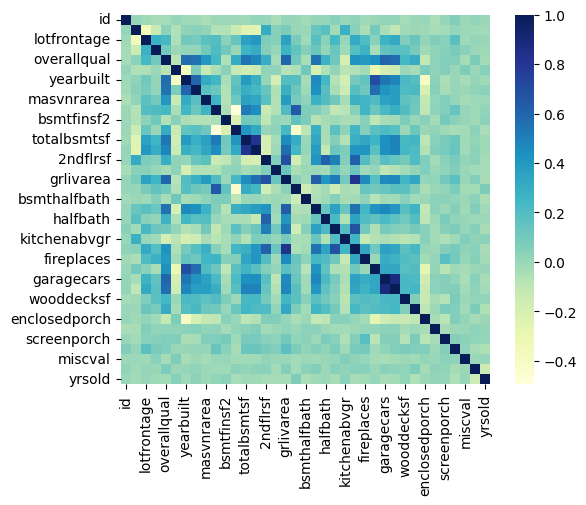

In [22]:
# Plotting price correlation
price = train.drop('saleprice', axis=1)
#creating a correlation matrix
correlations = price.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Hot Encoding

In [23]:
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
CatVariables = train.select_dtypes(include=['object'])
for feature in CatVariables:
    train[feature] = le.fit_transform(train[feature].astype(str))

Detecting Outliers

In [25]:
from sklearn.ensemble import IsolationForest 
outliers = IsolationForest(contamination=0.05).fit_predict(train)
print('Rows with outliers:', np.where(outliers))


c:\Users\James.Osolo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Rows with outliers: (array([   0,    1,    2, ..., 1457, 1458, 1459], dtype=int64),)


In [26]:
train = train.drop(np.where(outliers<1)[0])
train.shape


(1387, 81)

Data train and split

In [27]:

# Spliting target variable and independent variables
X = train.drop(columns=['id','saleprice'])
y = train['saleprice']

In [28]:
print(len(X), len(y))

1387 1387


In [29]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
X_train, x_test, y_train, y_test =train_test_split(X,y, test_size = 0.23, random_state =5)

1. Linear Regression

a. Model training

In [30]:

from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
# Train the model using the training sets 
model = lm.fit(X_train,y_train)


b. Model evaluation

In [31]:
# Model prediction on train data
pred_y = lm.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
1033,230000,252263.431209
1431,143750,130876.750154
833,167000,171401.243997
734,108000,98272.918280
35,309000,304009.564603


In [32]:
# Model Evaluation
import sklearn
from sklearn.metrics import r2_score
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
r2_score = mse = r2_score(y_test, pred_y)
print("mse is:", mse)
print("r2_score is:",r2_score )

mse is: 0.8677412170761718
r2_score is: 0.8677412170761718


In [33]:
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge
pipe = make_pipeline(PolynomialFeatures(degree=1),Ridge(alpha=100))
scores = cross_val_score(pipe, X, y, cv=3, scoring='neg_root_mean_squared_error')

print(scores, scores.mean())

[-23031.56335418 -26677.65845019 -22774.91275978] -24161.378188050327


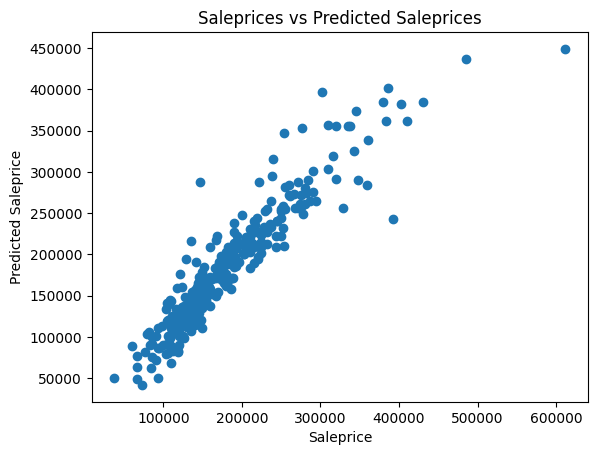

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test,pred_y)
plt.xlabel('Saleprice')
plt.ylabel('Predicted Saleprice')
plt.title("Saleprices vs Predicted Saleprices")
plt.show()

Test Data

In [35]:
# Predicting Test data with the model
y_test_pred = lm.predict(x_test)

In [36]:
# Model Evaluation
import sklearn
from sklearn.metrics import r2_score
mse = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
r2_score = mse = r2_score(y_test, y_test_pred)
print("mse is:", mse)
print("r2_score is:",r2_score )


mse is: 0.8677412170761718
r2_score is: 0.8677412170761718
